TASK 3 AMAL


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import display,HTML
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

DATA

In [27]:
url = 'train.csv'
data = pd.read_csv(url, delimiter=';')
display(HTML("<h1>Sample Data</h1>"))
data.rename(columns={'y': 'deposit'}, inplace=True)
display(data.head())
display(HTML("<h1>Dataset Info</h1>"))
columns = data.columns
non_null_counts = data.notnull().sum()
dtypes = data.dtypes
info_table = pd.DataFrame({
    'Column Names': columns,
    'Non-Null Count': non_null_counts,
    'Data-type': dtypes
})
info_table = info_table.reset_index(drop=True)
display(info_table)
display(HTML("<h1>Null Value Count</h1>"))
null_counts = data.isnull().sum()
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column Names', 'Null Count']
display(null_counts_df)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,Column Names,Non-Null Count,Data-type
0,age,45211,int64
1,job,45211,object
2,marital,45211,object
3,education,45211,object
4,default,45211,object
5,balance,45211,int64
6,housing,45211,object
7,loan,45211,object
8,contact,45211,object
9,day,45211,int64


,Column Names,Null Count
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,balance,0
6,housing,0
7,loan,0
8,contact,0
9,day,0


EDA(EXPLORATORY DATA ANALYSIS)

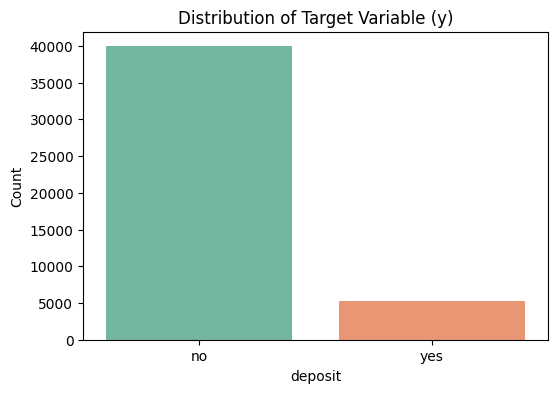

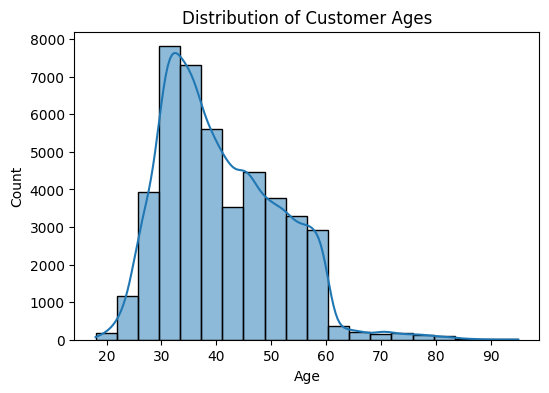

C:\Users\amal krishnan\AppData\Local\Temp\ipykernel_3888\1799174596.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=data, palette='Set2')


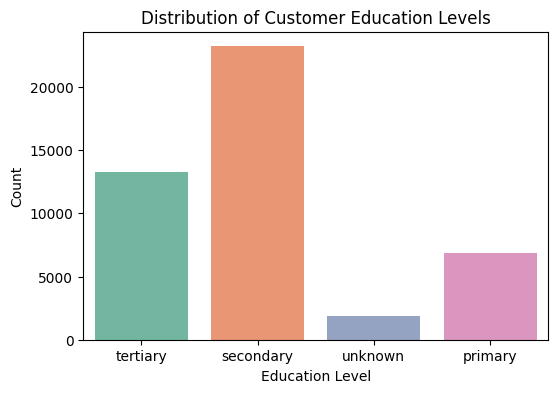

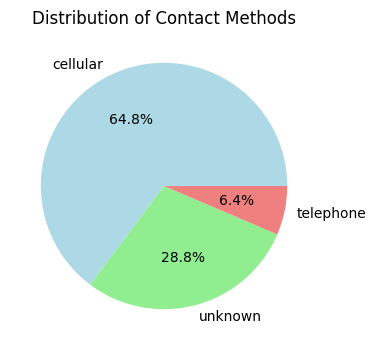

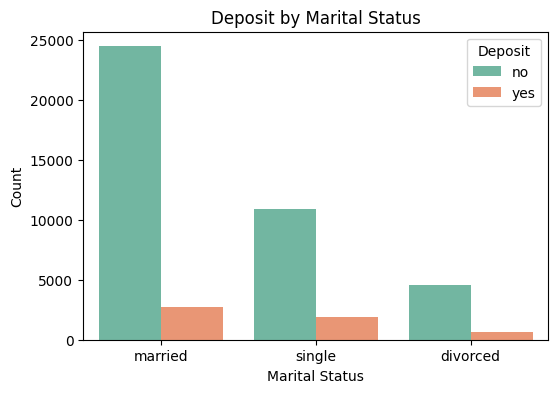

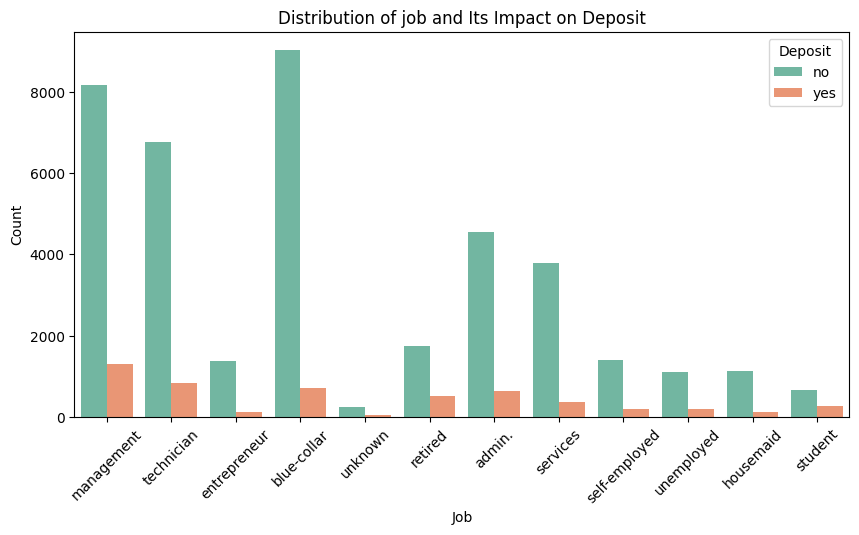

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', hue='deposit', data=data, palette='Set2')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('deposit')
plt.ylabel('Count')
display(HTML("<h1>EDA</h1>"))
plt.show()
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=data, palette='Set2')
plt.title('Distribution of Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(6, 4))
data['contact'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', 
    colors=['lightblue', 'lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Distribution of Contact Methods')
plt.ylabel('')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='deposit', data=data, palette='Set2')
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=data['job'], data=data, palette='Set2', hue='deposit')
plt.title(f"Distribution of job and Its Impact on Deposit")
plt.xlabel('Job')  # Corrected x-axis label
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

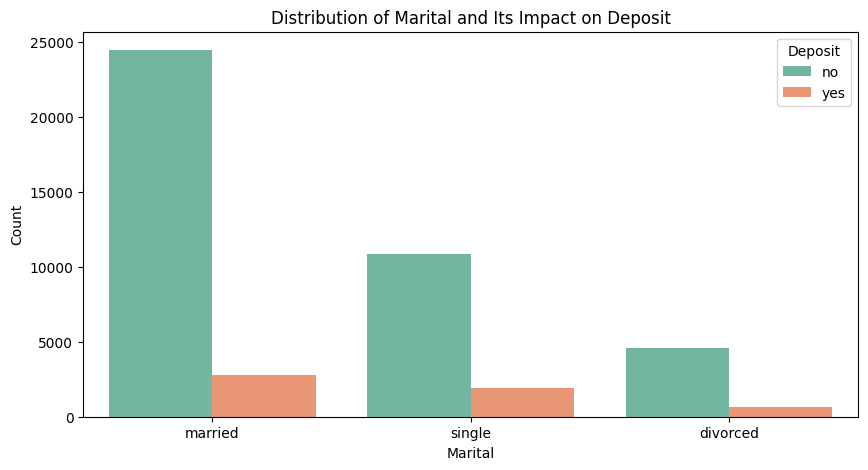

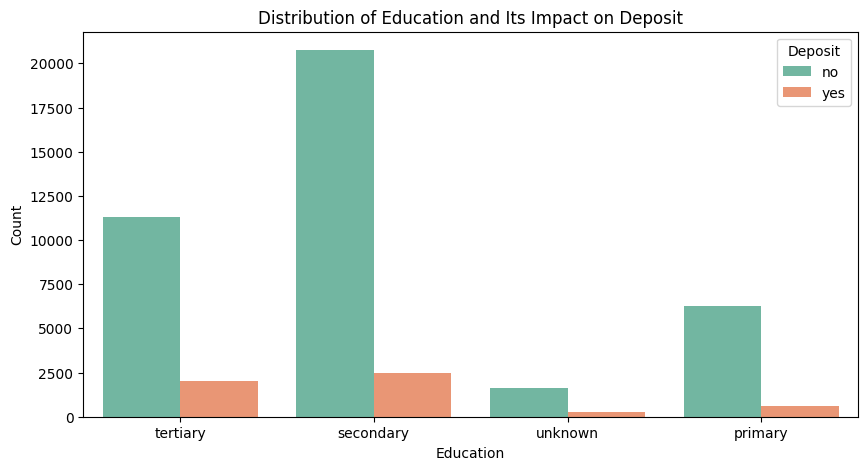

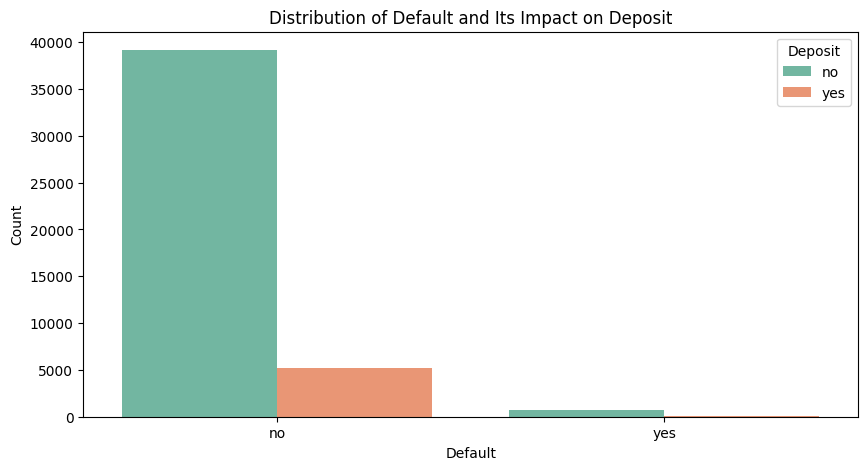

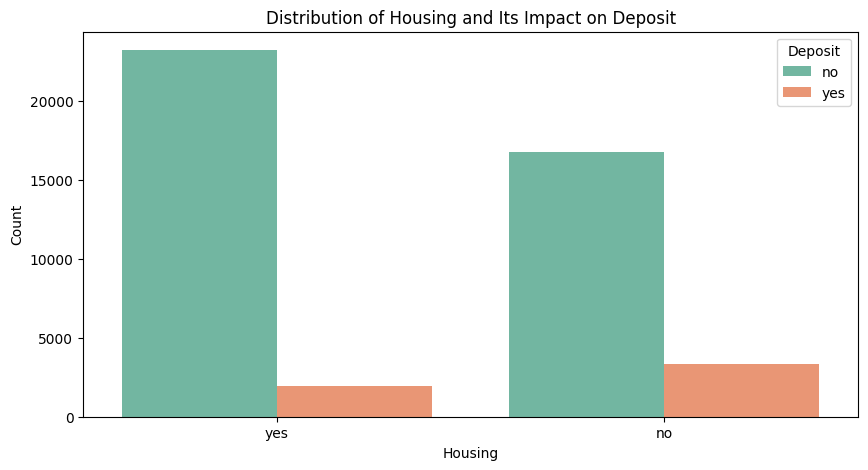

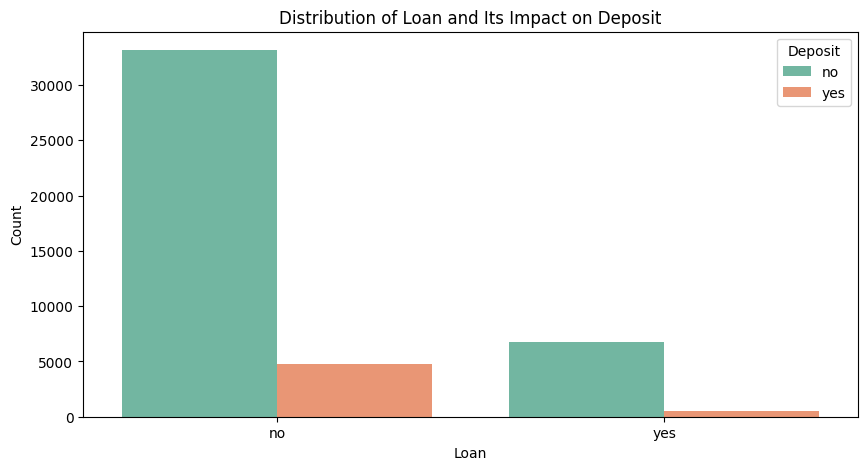

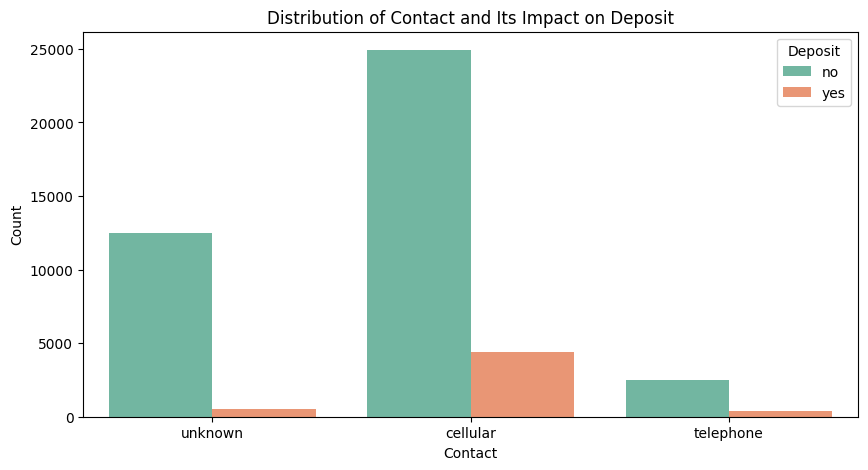

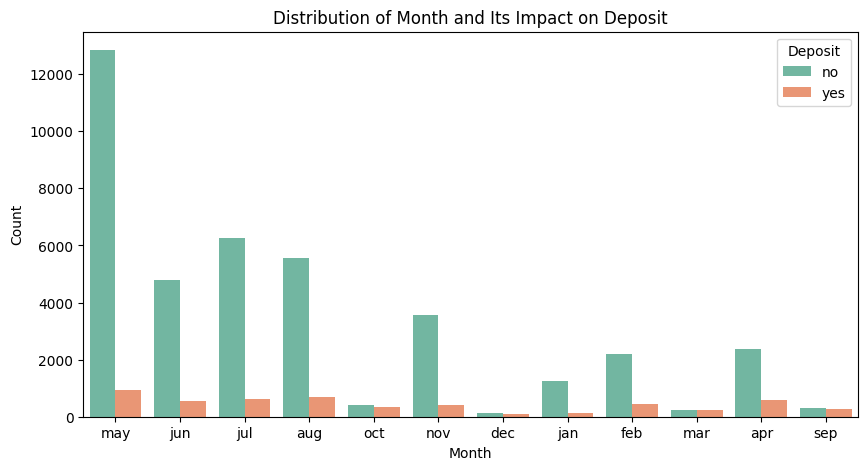

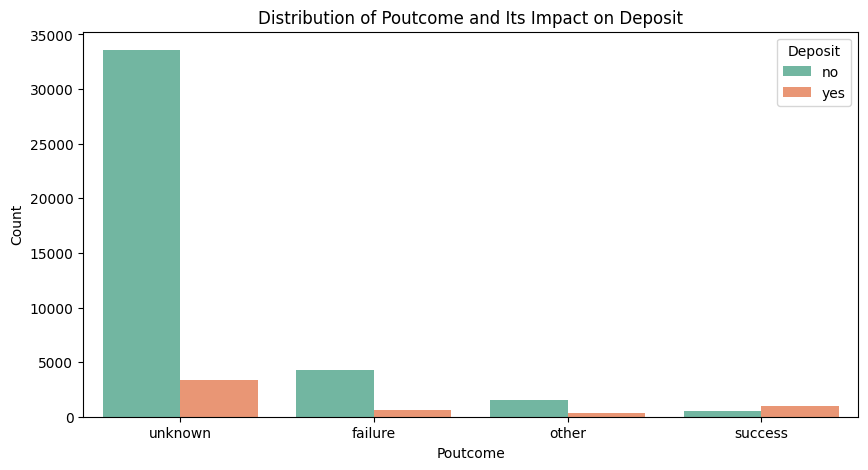

In [29]:
features_to_explore = ['marital', 'education', 'default',  'housing',
       'loan', 'contact', 'month',  'poutcome']
for feature in features_to_explore:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, palette='Set2', hue='deposit')
    plt.title(f'Distribution of {feature.capitalize()} and Its Impact on Deposit')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Deposit', loc='upper right')
    plt.show()

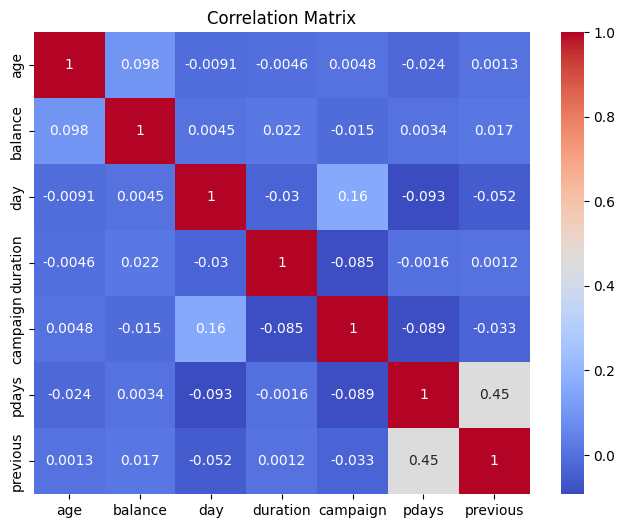

In [30]:
correlation_matrix = data.select_dtypes(exclude="object").corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

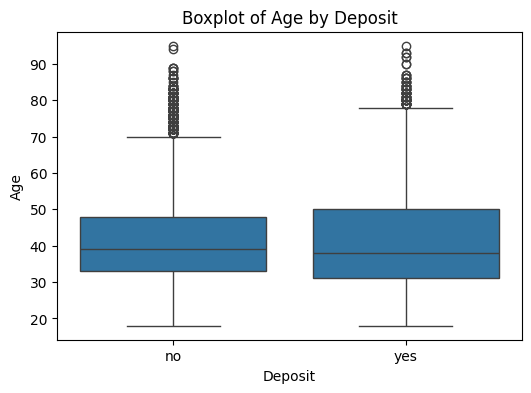

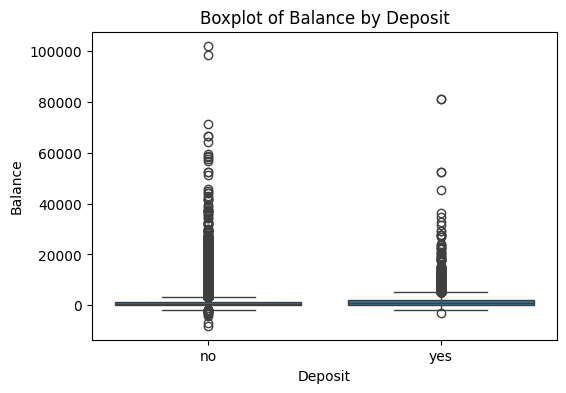

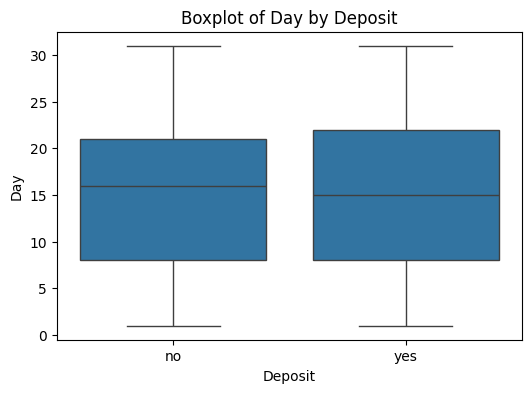

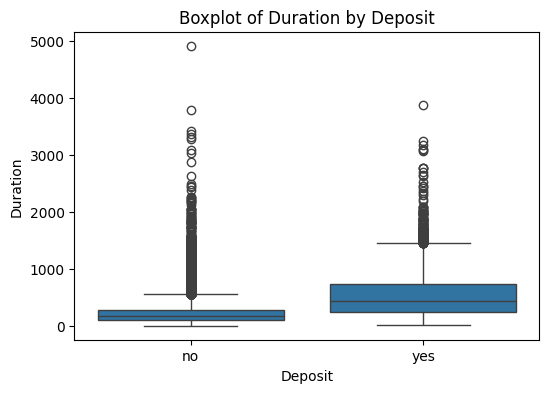

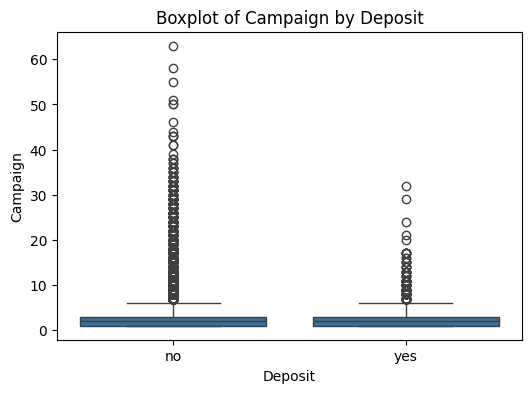

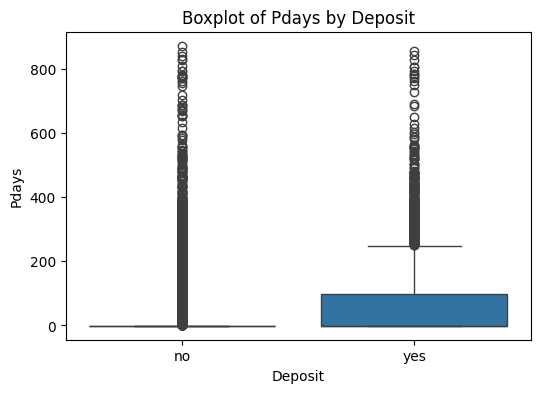

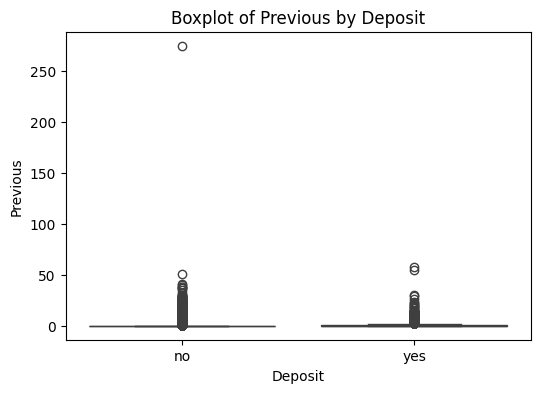

In [31]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Box plot for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='deposit', y=feature, data=data)
    plt.title(f'Boxplot of {feature.capitalize()} by Deposit')
    plt.xlabel('Deposit')
    plt.ylabel(feature.capitalize())
    plt.show()

DATA PRE PROCESSING

In [32]:
df = data
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)
df['default'] = df['default'].replace({"yes": 1 , "no": 0})
df['housing'] = df['housing'].replace({"yes": 1 , "no": 0})
df['loan'] = df['loan'].replace({"yes": 1 , "no": 0})
df['deposit'] = df['deposit'].replace({"yes": 1 , "no": 0})
df['previous'] = df['previous'].apply(lambda x: 0 if x == 0 else 1)
df.drop(columns=['pdays'], inplace=True)
df['education'] = df['education'].replace({"tertiary": 2 , "secondary": 1 , "primary" :0})
df['month'] = df['month'].replace({"jan": 1, "feb": 2, "mar" :3,
                                   "apr":4 ,"may": 5, "jun":6,
                                   "jul":7 , "aug":8, "sep": 9,
                                   "oct": 10, "nov": 11 , "dec":12})
df = pd.get_dummies(df, columns=["job", "marital", "poutcome" , "contact"]  , drop_first = True , dtype = int )
display(df.head())

C:\Users\amal krishnan\AppData\Local\Temp\ipykernel_3888\754398000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
C:\Users\amal krishnan\AppData\Local\Temp\ipykernel_3888\754398000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone
0,58,2,0,2143,1,0,5,5,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,1,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,1,0
2,33,1,0,2,1,1,5,5,76,1,...,0,0,0,0,1,0,0,0,1,0
3,47,1,0,1506,1,0,5,5,92,1,...,0,0,0,0,1,0,0,0,1,0
4,33,1,0,1,0,0,5,5,198,1,...,0,0,0,0,0,1,0,0,1,0


SCALING

In [33]:
columns = df.columns 
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df , columns=[columns])
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone
0,0.519481,1.0,0.0,0.092259,1.0,0.0,0.133333,0.363636,0.053070,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.337662,0.5,0.0,0.073067,1.0,0.0,0.133333,0.363636,0.030704,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.194805,0.5,0.0,0.072822,1.0,1.0,0.133333,0.363636,0.015453,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.376623,0.5,0.0,0.086476,1.0,0.0,0.133333,0.363636,0.018707,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.194805,0.5,0.0,0.072812,0.0,0.0,0.133333,0.363636,0.040260,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


USING SMOTE

In [34]:
# Separating the target variable and features
y = df["deposit"]
X = df.drop("deposit", axis=1)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the training data
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

# Displaying the value counts
display(HTML("<h1>y Train Value Count</h1>"))
display(y_train.value_counts())

display(HTML("<h1>y Test Value Count</h1>"))
display(y_test.value_counts())

C:\Users\amal krishnan\AppData\Local\Temp\ipykernel_3888\1363338088.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop("deposit", axis=1)


(deposit,)
0.0           31970
1.0           31970
Name: count, dtype: int64

(deposit,)
0.0           7952
1.0           1091
Name: count, dtype: int64

MODELLING + EVALUATION

In [35]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

,precision,recall,f1-score,support
0.0,0.94,0.90,0.92,7952.00
1.0,0.44,0.55,0.48,1091.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.69,0.72,0.70,9043.00
weighted avg,0.88,0.86,0.87,9043.00


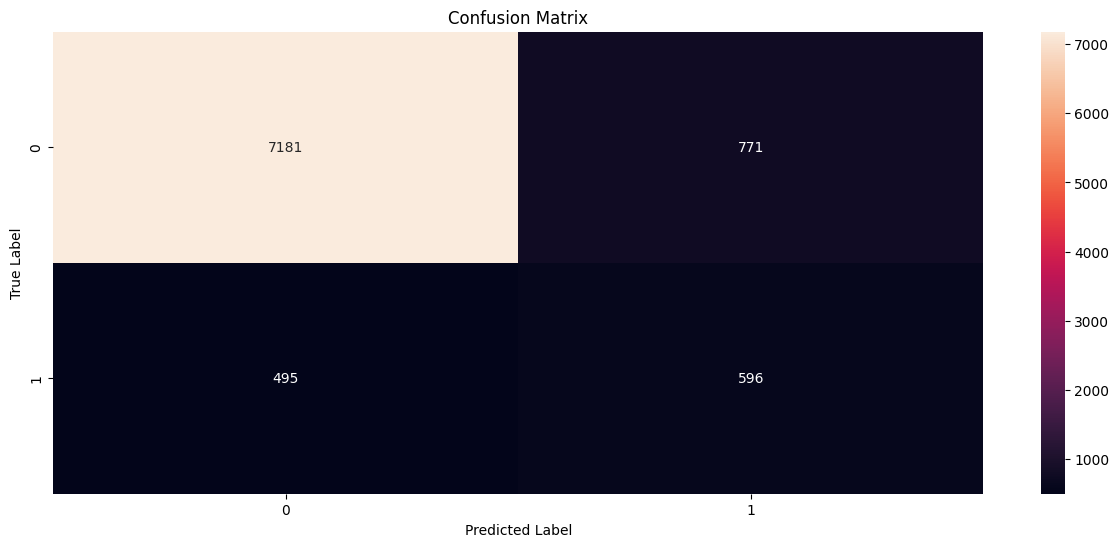

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h3>Accuracy: {accuracy:.2f}</h3>"))

# Generate a classification report
display(HTML(f"<h4>Classification Report</h4>"))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame using HTML
html_report = report_df.to_html(classes='table table-striped table-bordered', float_format="{:0.2f}".format)
display(HTML(html_report))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

VISUALIZING THE DECISION TREE

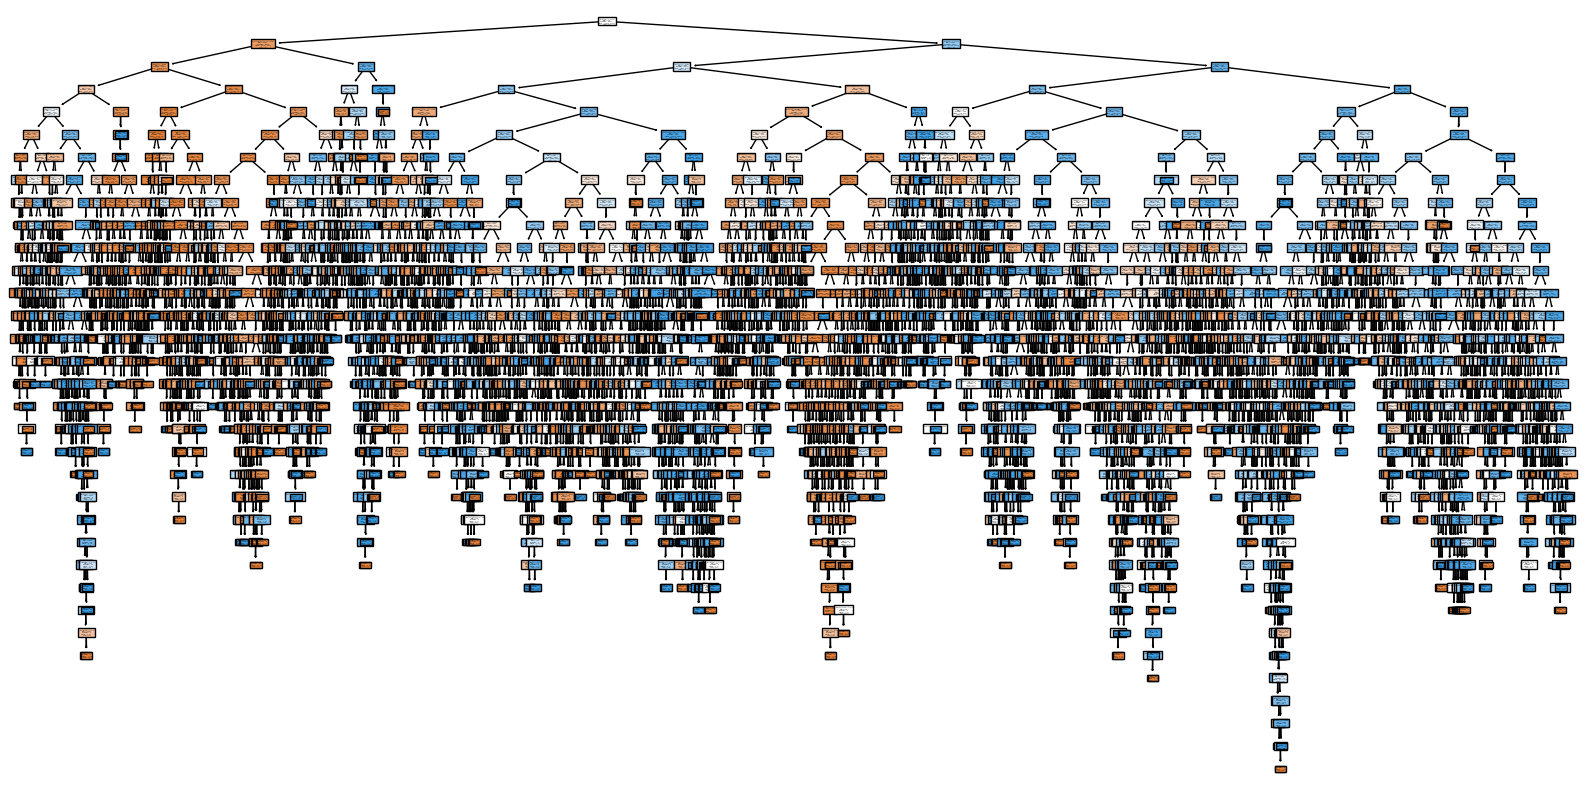

In [37]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

CROSS VALIDATION

In [38]:
cv_scores = cross_val_score(model, X, y, cv=5)
display(HTML(f"<h3>Cross-Validation Scores: {cv_scores}</h3>"))
display(HTML(f"<h3>Mean Cross-Validation Score: {cv_scores.mean():.2f}</h3>"))

ROC-AUC SCORE

In [39]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
display(HTML(f"<h3>ROC-AUC Score: {roc_auc:.2f}</h3>"))

PRECISION RECALL CURVE

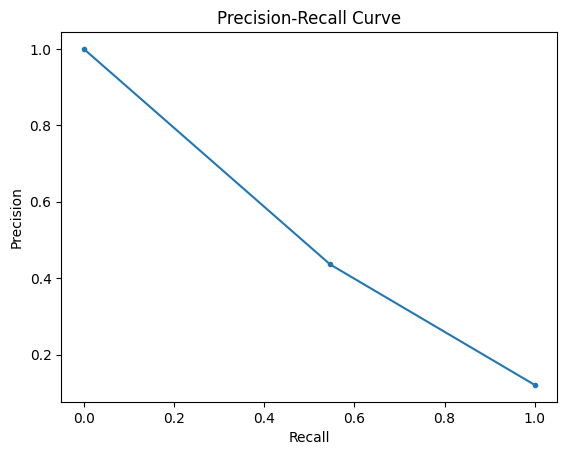

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

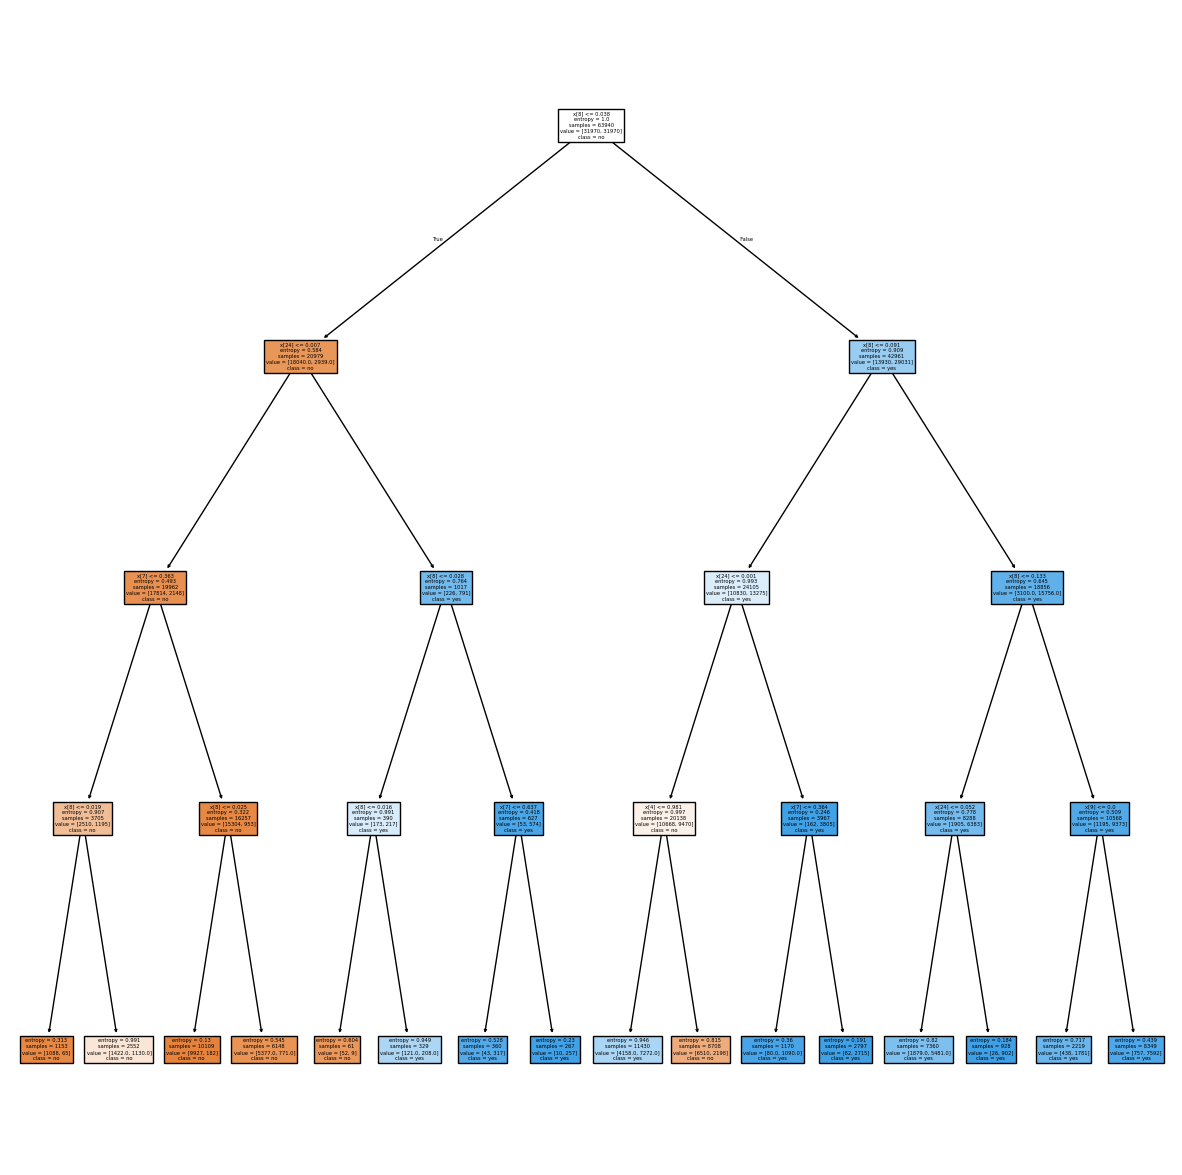

In [41]:
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
model_2.fit(X_train, y_train)
ypred_model_2 = model_2.predict(X_test)
accuracy = accuracy_score(y_test, ypred_model_2)
plt.figure(figsize=(15, 15))
plot_tree(model_2, class_names=['no', 'yes'], filled=True)
plt.show()
